## “Beer is proof that God loves us and wants us to be happy.” - Ben Franklin

In [43]:
# Import dependencies
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# read in the dataset
beer_df = pd.read_csv("../../Final_Project/beer_reviews.csv")
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beer_df.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [5]:
# Count the rows
len(beer_df)

1586614

In [6]:
# Change the review_time column to datetime
beer_df["review_time"] = pd.to_datetime(beer_df["review_time"], unit = 's' )
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1586614 non-null  int64         
 1   brewery_name        1586599 non-null  object        
 2   review_time         1586614 non-null  datetime64[ns]
 3   review_overall      1586614 non-null  float64       
 4   review_aroma        1586614 non-null  float64       
 5   review_appearance   1586614 non-null  float64       
 6   review_profilename  1586266 non-null  object        
 7   beer_style          1586614 non-null  object        
 8   review_palate       1586614 non-null  float64       
 9   review_taste        1586614 non-null  float64       
 10  beer_name           1586614 non-null  object        
 11  beer_abv            1518829 non-null  float64       
 12  beer_beerid         1586614 non-null  int64         
dtypes: datetime6

In [7]:
# Count null values
beer_df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [8]:
# How much of the dataset is null?
percent_null = beer_df.isnull().sum()/len(beer_df) *100
print(percent_null)

brewery_id            0.000000
brewery_name          0.000945
review_time           0.000000
review_overall        0.000000
review_aroma          0.000000
review_appearance     0.000000
review_profilename    0.021934
beer_style            0.000000
review_palate         0.000000
review_taste          0.000000
beer_name             0.000000
beer_abv              4.272306
beer_beerid           0.000000
dtype: float64


In [9]:
# At worst, we're only losing less than 4.5% of the dataset by dropping rows with null values
beer_df = beer_df.dropna()
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1518478 non-null  int64         
 1   brewery_name        1518478 non-null  object        
 2   review_time         1518478 non-null  datetime64[ns]
 3   review_overall      1518478 non-null  float64       
 4   review_aroma        1518478 non-null  float64       
 5   review_appearance   1518478 non-null  float64       
 6   review_profilename  1518478 non-null  object        
 7   beer_style          1518478 non-null  object        
 8   review_palate       1518478 non-null  float64       
 9   review_taste        1518478 non-null  float64       
 10  beer_name           1518478 non-null  object        
 11  beer_abv            1518478 non-null  float64       
 12  beer_beerid         1518478 non-null  int64         
dtypes: datetime6

In [10]:
# Check for highest and lowest ratings
beer_df["review_overall"].value_counts()

4.0    559790
4.5    314303
3.5    286901
3.0    155840
5.0     88997
2.5     54660
2.0     35737
1.5     12032
1.0     10211
0.0         7
Name: review_overall, dtype: int64

In [11]:
# A very small percentage (7 out of 1.5 million) of beers have a 0 rating, so these can be dropped.
beer_df = beer_df[beer_df.review_overall != 0]

In [12]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518471 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1518471 non-null  int64         
 1   brewery_name        1518471 non-null  object        
 2   review_time         1518471 non-null  datetime64[ns]
 3   review_overall      1518471 non-null  float64       
 4   review_aroma        1518471 non-null  float64       
 5   review_appearance   1518471 non-null  float64       
 6   review_profilename  1518471 non-null  object        
 7   beer_style          1518471 non-null  object        
 8   review_palate       1518471 non-null  float64       
 9   review_taste        1518471 non-null  float64       
 10  beer_name           1518471 non-null  object        
 11  beer_abv            1518471 non-null  float64       
 12  beer_beerid         1518471 non-null  int64         
dtypes: datetime6

In [13]:
# Check for and count duplicate rows (there are none)
len(beer_df)-len(beer_df.drop_duplicates())

0

In [14]:
# Check to see if a beer has been reviewed more than once by the same reviewer
len(beer_df) - len(beer_df.drop_duplicates(subset = ["review_profilename", "beer_beerid"]))

14441

In [15]:
# Drop duplicate rows where a reviewer reviewed a beer more than once
# We want to keep the highest score of the beer

# We want to keep most recent

beer_df = beer_df.sort_values("review_overall", ascending = False)
beer_df = beer_df.drop_duplicates(subset = ["review_profilename", "beer_beerid"])

In [16]:
# Count of different number of beers and beer styles reviewed
beer_df.nunique(axis =0)

brewery_id               5230
brewery_name             5155
review_time           1496140
review_overall              9
review_aroma                9
review_appearance           9
review_profilename      32908
beer_style                104
review_palate               9
review_taste                9
beer_name               44075
beer_abv                  530
beer_beerid             49000
dtype: int64

In [17]:
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586613,14359,The Defiant Brewing Company,2006-10-04 23:41:59,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061
488402,132,Rogue Ales,2010-11-25 01:21:47,5.0,3.5,5.0,BeerDawgs,Maibock / Helles Bock,5.0,5.0,Dead Guy Ale,6.5,355
488442,132,Rogue Ales,2010-10-21 22:19:10,5.0,4.0,4.5,audioserf,Maibock / Helles Bock,4.0,4.5,Dead Guy Ale,6.5,355
488443,132,Rogue Ales,2010-10-21 00:13:37,5.0,4.0,4.5,ratrod53,Maibock / Helles Bock,4.0,4.5,Dead Guy Ale,6.5,355
488444,132,Rogue Ales,2010-10-19 04:06:21,5.0,4.0,4.5,superdoopersauce,Maibock / Helles Bock,4.5,4.5,Dead Guy Ale,6.5,355


In [18]:
# top 10 rated beer styles
beer_df.groupby("beer_style").mean()["review_overall"].sort_values(ascending = False).head(10)

beer_style
American Wild Ale                   4.100412
Gueuze                              4.087288
Quadrupel (Quad)                    4.073894
Lambic - Unblended                  4.061896
American Double / Imperial Stout    4.030544
Russian Imperial Stout              4.024606
Weizenbock                          4.011208
American Double / Imperial IPA      4.000006
Flanders Red Ale                    3.996543
Keller Bier / Zwickel Bier          3.991705
Name: review_overall, dtype: float64

In [19]:
# top breweries
beer_df.groupby("brewery_name").mean()["review_overall"].sort_values(ascending = False).head(25)

brewery_name
Hakone Beer                                                    5.000000
Legends Sportsbar And Brewpub                                  5.000000
Binghams Brewery                                               5.000000
Liebhart's Privatbrauerei Detmold                              5.000000
Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof    5.000000
Facer's Flintshire Brewery                                     5.000000
Rascal Creek Brewing Co.                                       5.000000
Kunino Cho                                                     5.000000
Elizabeth Street Brewery                                       5.000000
Brass Monkey Brewing Co.                                       5.000000
Ludwig Roth Bierbrauerei GmbH                                  5.000000
SandLot Brewery @ Coors Field                                  5.000000
Hamanako Brewery                                               5.000000
Edsten Brewing Company                             

In [20]:
# Most popular beers (most ratings)
pop_beer = beer_df.groupby("beer_name").count()["review_overall"].sort_values(ascending = False)
pop_beer

beer_name
90 Minute IPA                          3206
Old Rasputin Russian Imperial Stout    3038
Sierra Nevada Celebration Ale          2929
India Pale Ale                         2926
Stone Ruination IPA                    2644
                                       ... 
La Grihète Blanche                        1
La Grihète Bière De Printemps             1
La Grigna                                 1
La Grenouille                             1
葉山ビール (Hayama Beer)                       1
Name: review_overall, Length: 44075, dtype: int64

In [28]:
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586613,14359,The Defiant Brewing Company,2006-10-04 23:41:59,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061
488402,132,Rogue Ales,2010-11-25 01:21:47,5.0,3.5,5.0,BeerDawgs,Maibock / Helles Bock,5.0,5.0,Dead Guy Ale,6.5,355
488442,132,Rogue Ales,2010-10-21 22:19:10,5.0,4.0,4.5,audioserf,Maibock / Helles Bock,4.0,4.5,Dead Guy Ale,6.5,355
488443,132,Rogue Ales,2010-10-21 00:13:37,5.0,4.0,4.5,ratrod53,Maibock / Helles Bock,4.0,4.5,Dead Guy Ale,6.5,355
488444,132,Rogue Ales,2010-10-19 04:06:21,5.0,4.0,4.5,superdoopersauce,Maibock / Helles Bock,4.5,4.5,Dead Guy Ale,6.5,355


In [29]:
# Principal Component Analysis to determine most important featuers to overall score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [32]:
features_df = beer_df[["review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv"]]

In [33]:
# Standardize the data with StandardScaler
beer_scaled = StandardScaler().fit_transform(features_df)

In [34]:
# Initialize PCA model
pca = PCA(n_components=5)

In [35]:
# Get five components from the dataset
beer_pca = pca.fit_transform(beer_scaled)

In [36]:

# Transform pca to a dataframe
df_beer_pca = pd.DataFrame(data = beer_pca, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
df_beer_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.794191,-1.333729,-0.122216,-0.098369,0.171212
1,-2.308071,-1.059293,-0.717691,1.523679,-0.686146
2,-1.237673,-0.621975,-0.427020,-0.014494,-0.504513
3,-1.237673,-0.621975,-0.427020,-0.014494,-0.504513
4,-1.597219,-0.749670,-0.268781,0.476446,-0.143290


In [37]:
# Get the explained variance
pca.explained_variance_ratio_

array([0.60763793, 0.16694772, 0.10189371, 0.07673495, 0.0467857 ])

In [39]:
# Remove beer_abv and see how much variance is removed
features_df = beer_df[["review_aroma", "review_appearance", "review_palate", "review_taste"]]
beer_scaled = StandardScaler().fit_transform(features_df)
pca = PCA(n_components=4)
beer_pca = pca.fit_transform(beer_scaled)
df_beer_pca = pd.DataFrame(data = beer_pca, columns = ["PC1", "PC2", "PC3", "PC4"])
pca.explained_variance_ratio_

array([0.71735896, 0.12736998, 0.09659024, 0.05868082])

In [40]:
# We still get over 99% of the variance
# So lets get rid of review_palate
features_df = beer_df[["review_aroma", "review_appearance", "review_taste"]]
beer_scaled = StandardScaler().fit_transform(features_df)
pca = PCA(n_components=3)
beer_pca = pca.fit_transform(beer_scaled)
df_beer_pca = pd.DataFrame(data = beer_pca, columns = ["PC1", "PC2", "PC3"])
pca.explained_variance_ratio_

array([0.73820193, 0.16665705, 0.09514102])

In [41]:
# Next step: Find correlation between review_overall and each of the five features

array([0.85710851, 0.14289149])

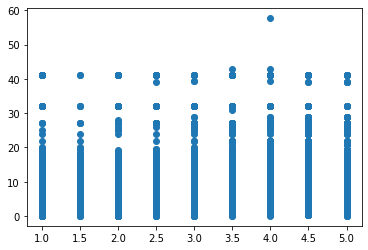

In [47]:
x = beer_df["review_overall"]
y = beer_df["beer_abv"]
plt.scatter(x,y)